# Marketing Analytics for a Food Delivery Platform
## Part II - Explanatory Data Analysis
### by Keenan Cooper

## Investigation Overview

Working as a data analyst for an online food ordering and food delivery platform, I've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. I will analyze the data set to understand this problem and propose data-driven insights and recommendations.


## Dataset Overview

The dataset consists of 2,240 customers of an online food ordering and food delivery platform. The dataset contains data on:
- Customer profiles
- Product preferences
- Campaign successes/failures
- Channel performance

In [1]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization defaults
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
default_color = '#0b559f' # Deep blue 
default_color_2 = '#05712f'# Deep green
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Confirm
plt.rcParams["figure.figsize"]

[10.0, 6.0]

In [2]:
# Load in the dataset into a pandas dataframe

df = pd.read_csv("marketing_cleaned.csv")

## 1. Campaign Success

Generally, campaigns have been unsuccessful. Only the most recent campaign broke above a 10% success rate at 14.8%. Others have ranged from "underwhelming" at around 7% success to "complete failure" with campaign 2's 1.3% win rate. I'd recommend analyzing what differentiated the recent successful campaign from unsuccessful campaign 2, then shaping future campaigns with this insight.

Further segmenting by country, we can see how poorly campaign 2 did in Australia and America. That is worth investigating. As with campaigns 1, 3, and 4, Australia had been a country of little success. This has changed more favorably in campaigns 5 and 6, however. What changed?

Special attention should be paid to India as campaigns 5 and 6 underperformed. Why were Indian customers not receptive to the most recent campaigns? India was the most receptive in campaign 3. I'd recommend looking at the recent successes in Spain and South Africa then adapting those strategies to the Indian market.

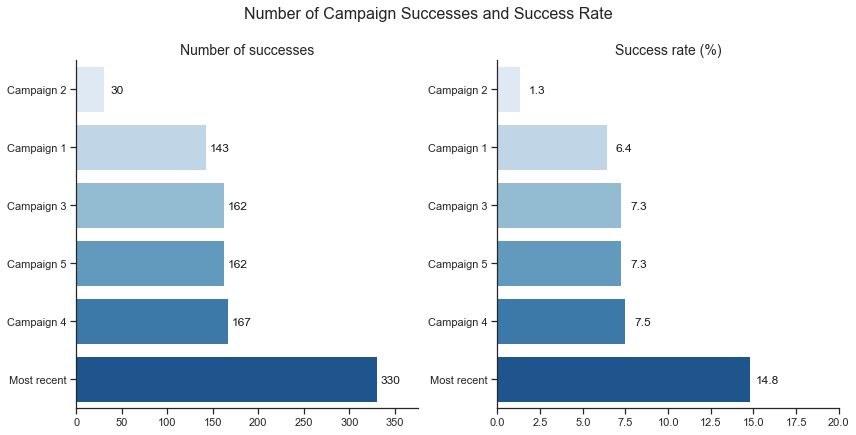

In [3]:
campaigns = [col for col in df.columns if 'Cmp' in col]+["Response"]

# Change to dataframe that is easy to plot
campaigns_df = pd.DataFrame(df[campaigns].sum(), columns=['Sum']).sort_values(by='Sum').reset_index()

campaigns_df["Rate"]= campaigns_df["Sum"]/2233*100

# Visualize results
fig, ax = plt.subplots(ncols=2, figsize=[12,6])

labels=["Campaign 2", "Campaign 1", "Campaign 3", "Campaign 5", "Campaign 4", "Most recent"]

# Create left-hand horizontal bar plot
ax[0] = sns.barplot(x='Sum', y='index', data=campaigns_df, ax=ax[0], palette="Blues")
ax[0].set_title(label='Number of successes', fontdict={'fontsize': 14})
ax[0].set(xlim=(0,375), xlabel='', ylabel='')
ax[0].set_yticklabels(labels)

# Add bar values
for p,q in zip(ax[0].patches, campaigns_df['Sum']):
    ax[0].text(x=q+15,
               y=p.get_y()+0.51,
               s=q,
               ha="center",
               va="bottom",
               size="12",
               color="black", 
               alpha=0.9);

# Create right-hand horizontal bar plot
ax[1] = sns.barplot(x='Rate', y='index', data=campaigns_df, ax=ax[1], palette="Blues")
ax[1].set_title(label='Success rate (%)', fontdict={'fontsize': 14})
ax[1].set(xlim=(0,20), xlabel='', ylabel='')
ax[1].set_yticklabels(labels)

# Add bar values
for p,q in zip(ax[1].patches, round(campaigns_df['Rate'],1)):
    ax[1].text(x=q+1, 
               y=p.get_y()+0.51, 
               s=q,
               ha="center",
               va="bottom",
               size="12",
               color="black", 
               alpha=0.9);

fig.suptitle("Number of Campaign Successes and Success Rate", fontsize=16, y=1)
plt.tight_layout()

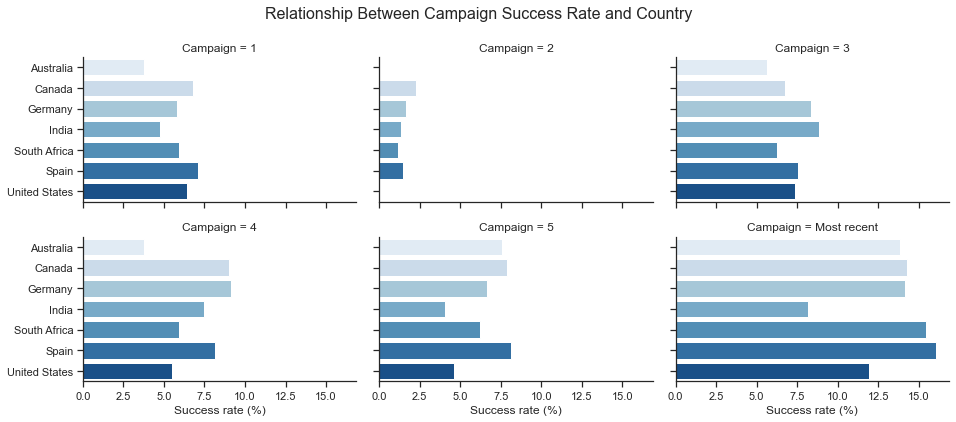

In [4]:
# Make dataframe for success of campaigns by country
columns= ['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']
df_campaign = df[columns].melt(id_vars='Country', 
                               var_name='Campaign', 
                               value_name='Success rate (%)')
df_campaign = pd.DataFrame(df_campaign.groupby(['Country', 'Campaign'])['Success rate (%)'].mean()*100).reset_index(drop=False)

# Rename campaign variables
dict={'AcceptedCmp1': '1', 'AcceptedCmp2': '2', 'AcceptedCmp3': '3', 
      'AcceptedCmp4': '4', 'AcceptedCmp5': '5', 'Response': 'Most recent'}
df_campaign['Campaign'] = df_campaign['Campaign'].replace(dict)

# Generate plots
g = sns.FacetGrid(df_campaign, col='Campaign', col_wrap=3, aspect=1.5)
g.map(sns.barplot, "Success rate (%)", 'Country', palette="Blues");

# Customize
g.set(ylabel='')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship Between Campaign Success Rate and Country", size=16)
plt.tight_layout(pad=1.5)

## 2. Sales Channels

The best performing channel was in-store and the worst performing were deals and catalog purchases. There were many customers that only made 1 or even 0 deals and catalog purchases. In-store purchases accounted for nearly 40% of purchases and online purchases—although higher than that of deals and catalogs—accounted for only 27%. Despite being an online food delivery platform, the average customer only made 4.1 purchases over the two-year sample of data.

I'd recommend focusing on web and mobile advertising (social media, email newsletters, smartphone apps, influencers, etc) to better cultivate the online sales channel. I'd advise the CMO to shift away from legacy paper modes like catalogs unless they were targeting an older demographic. It should be noted that this data sample, collected in 2015, was taken pre-Covid-19 so any advice may not be as relevant.

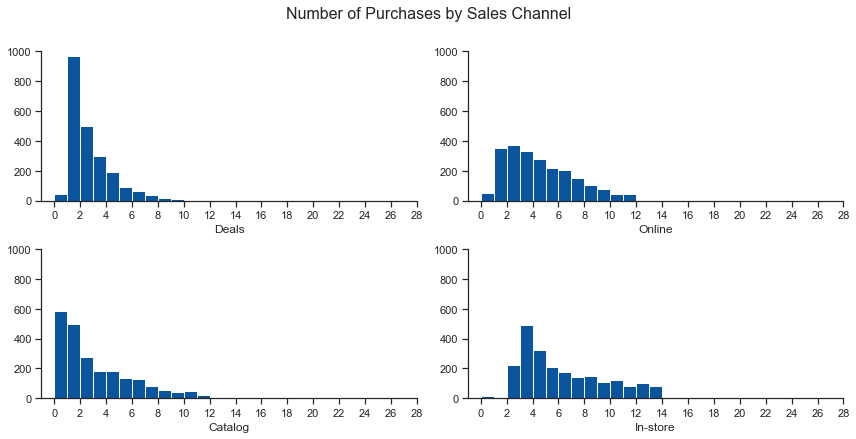

In [5]:
purchases = [col for col in df.columns if 'Purchases' in col]
purchases = purchases[:4]

plt.figure(figsize=[12,6])

xlabel = ["Deals", "Online", "Catalog", "In-store"]

for i in range(len(purchases)):
    var = purchases[i]
    plt.subplot(2,2,1+i)
    bins = np.arange(min(df[var]), max(df[var])+2, 1)
    plt.hist(data=df, x=var, bins=bins, color=default_color)
    plt.xlabel(xlabel[i])
    plt.ylim(0,1000)
    plt.xlim(-1,28)
    plt.xticks(np.arange(0, 28+2, 2))
    
plt.suptitle('Number of Purchases by Sales Channel', size=16, y=1.01)
plt.tight_layout()

In [6]:
# Create definition to add bar values
def hbarValue(ax):
    '''
    barPerc(): Add value to bar plots
    args:
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. Access the bars (aka patches)
    bars = ax.patches
    ## 2a. For each bar
    for bar in bars:
        # 3. Add text (.get_height() is the count/value)
        ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height()-0.53,
            f'{bar.get_width():.1f}%',
            ha="center",
            va="bottom",
            size="14",
            color="white")

In [7]:
# Create definition to create a custom horizontal bar plot
def hbar_share(var, title):
    # Get totals for each var
    total_by_var = np.sum(df[var].iloc[:,:], axis=0)
    # Add totals together for the total of variables
    total_vars = total_by_var.sum()
    # Derive percentage of total var for each var
    percent_by_var = (total_by_var/total_vars*100).sort_values(ascending=False)
    # Create optional labels for legend
    # Create horizontal boxplot object
    blues= ['#084a91', '#1764ab', '#2e7ebc', '#4a98c9', '#6caed6', '#94c4df']
    ax = percent_by_var.to_frame().T.plot.barh(stacked=True, figsize=(15, 6), color=blues)
    # Customize the plot
    plt.yticks([])
    plt.xlim((0,100))
    plt.title(title, size=16)
    # Add bar values
    hbarValue(ax)

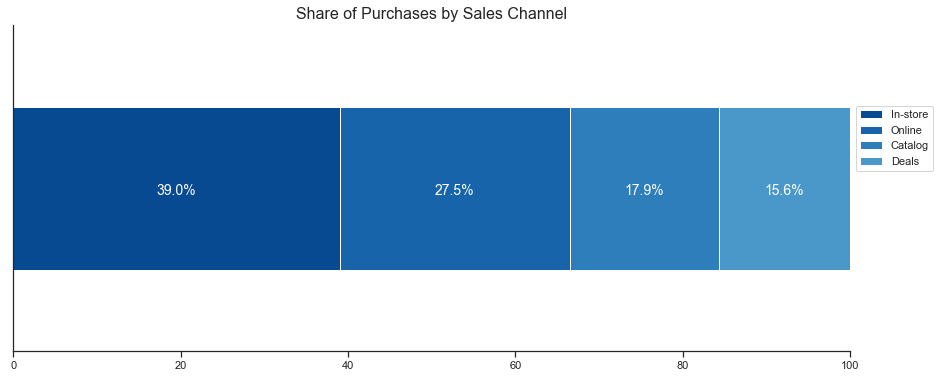

In [8]:
# Assign keyword arguments
var = purchases
title = 'Share of Purchases by Sales Channel'
labels = ["In-store", "Online", "Catalog", "Deals"]

# Create plot
hbar_share(var, title)
plt.legend(labels, bbox_to_anchor=(1,0.77));

## 3. Purchasing Trends

Wines and meat products are the top 2 best performing products in terms of sales. Customers on average spent \\$303.50 on wine, amounting to over 50% of the total share of purchases. Meanwhile, staples like fish, fruits, and sweets all fell well below the average of $100.80 per customer. 

I'd recommend using regular sales and promotions to increase the share and average amount spent on these products. Such campaigns may find more success if they were targeted towards families with more than 1 dependent, as I'll explore further next. 

In [9]:
# Isolate the "product type" columns
mnts = [col for col in df.columns if 'Mnt' in col]
mnts = mnts[:6]

# Get average amount spent by product type per customer
averages = df[mnts].mean()

# Get total average amount spent per customer
total_average = df[mnts].mean().mean()

# Make df of product averages
mean_product_df = pd.DataFrame(df[mnts].mean(), columns=['Average']).sort_values(by='Average',ascending=False).reset_index()

# Add total average to product average df
mean_product_df.loc[len(mean_product_df.index)] = ["Total", total_average]

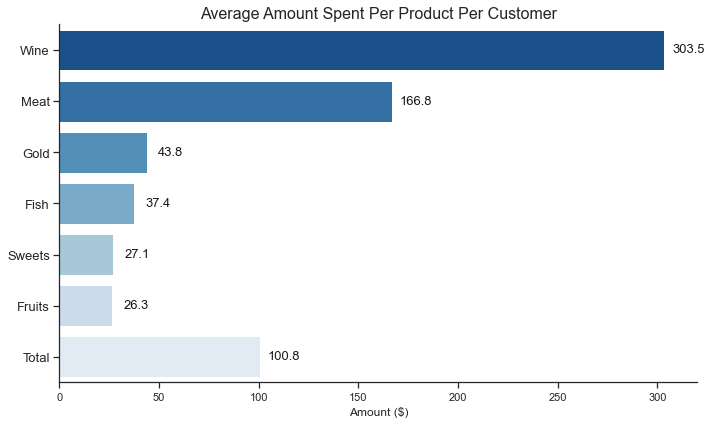

In [10]:
labels = ["Wine", "Meat", "Gold", "Fish", "Sweets", "Fruits", "Total"]

ax = sns.barplot(data=mean_product_df, x="Average", y="index", palette="Blues_r")
ax.set(xlim=(0,320), xlabel='Amount ($)', ylabel='')
ax.set_yticklabels(labels, size=13)

# Add bar values
for p,q in zip(ax.patches, round(mean_product_df['Average'],1)):
    ax.text(x=q+12,
            y=p.get_y()+0.51,
            s=q,
            ha="center",
            va="bottom",
            size="13",
            color="black", 
            alpha=0.9);

plt.title("Average Amount Spent Per Product Per Customer", fontsize=16)
plt.tight_layout()

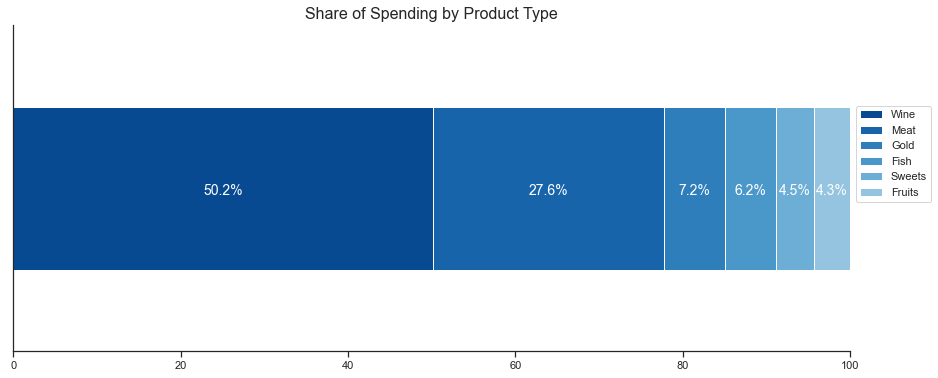

In [11]:
# Assign keyword arguments
var = mnts
title = 'Share of Spending by Product Type'
labels = ['Wine', "Meat", "Gold", "Fish", "Sweets", "Fruits"]

# Create plot
hbar_share(var, title)
plt.legend(labels, bbox_to_anchor=(1,0.77));

## 4. Number of Dependents

The sample of customer IDs averaged 1.0 dependents with most customers having at least 1 dependent. 0 dependents are the next largest bin with about 600 IDs. When examining the correlation between the number of dependents and key numerical metrics like total amount spent and the total number of purchases, they are negatively correlated. Meaning, the more dependents a customer has the fewer and smaller purchases they'll make. This may be due to the trend that customers with more children tend to have lower incomes, at least within this sample.

Although it may stand to reason that those with higher income would spend more, as seen in the bottom scatterplot, left unaddressed this is a wasted opportunity given that the majority of our customers have 1 or more children. This group should be targeted while maintaining sales of the higher-earning, higher-spending "0 dependent group". I would suggest splitting up campaign efforts into two directions: one direction targeting the "0 dependent group" and another targeting families. For the latter, focusing on fish, fruit, and sweets and other lower-cost goods may be more productive. Wine, gold, meat, and the like can be marketed more to the "0 dependents group".

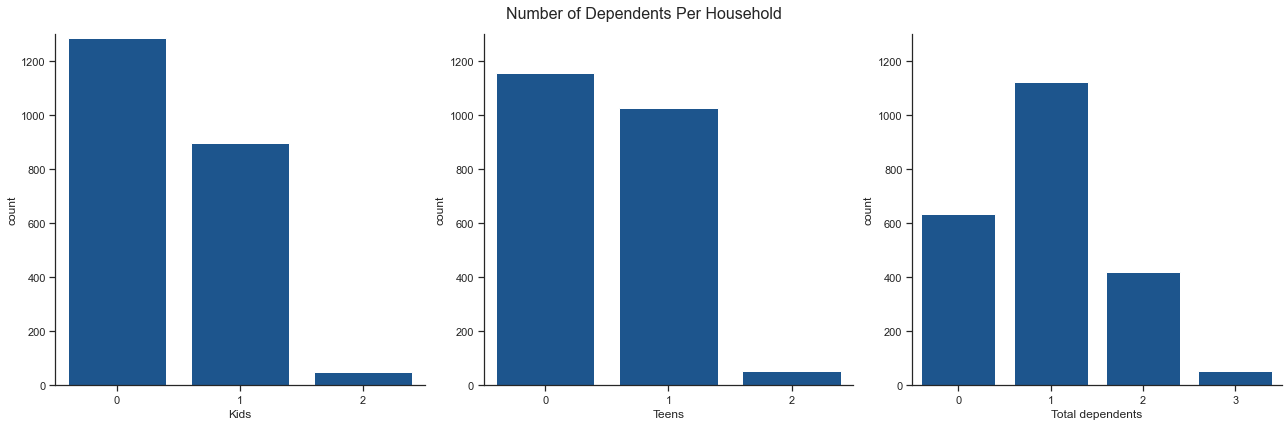

In [12]:
df['TotalDependents'] = df[["Kidhome","Teenhome"]].sum(axis=1)

plt.figure(figsize=[18,6])

xlabel = ["Kids", "Teens", "Total dependents"]
variables = ['Kidhome', 'Teenhome', 'TotalDependents']
for i in range(len(variables)):
    var = variables[i]
    plt.subplot(1,3,1+i)
    sns.countplot(data=df, x=var, color=default_color)
    plt.xlabel(xlabel[i])
    plt.ylim(0,1300)
    
# Customize plot
plt.suptitle("Number of Dependents Per Household", size=16)
plt.tight_layout();

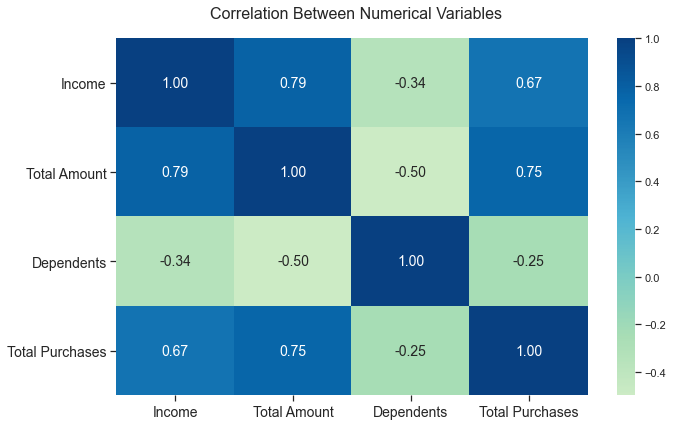

In [13]:
numeric_vars = ['Income','TotalMnt','TotalDependents','TotalPurchases']
labels = ["Income", "Total Amount", "Dependents", "Total Purchases"]

sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = "GnBu", center = 0, yticklabels=labels, xticklabels=labels, annot_kws={"size": 14});
plt.xticks(fontsize=14);
plt.yticks(rotation=0,fontsize=14)

plt.suptitle(t="Correlation Between Numerical Variables", fontsize=16)
plt.tight_layout();

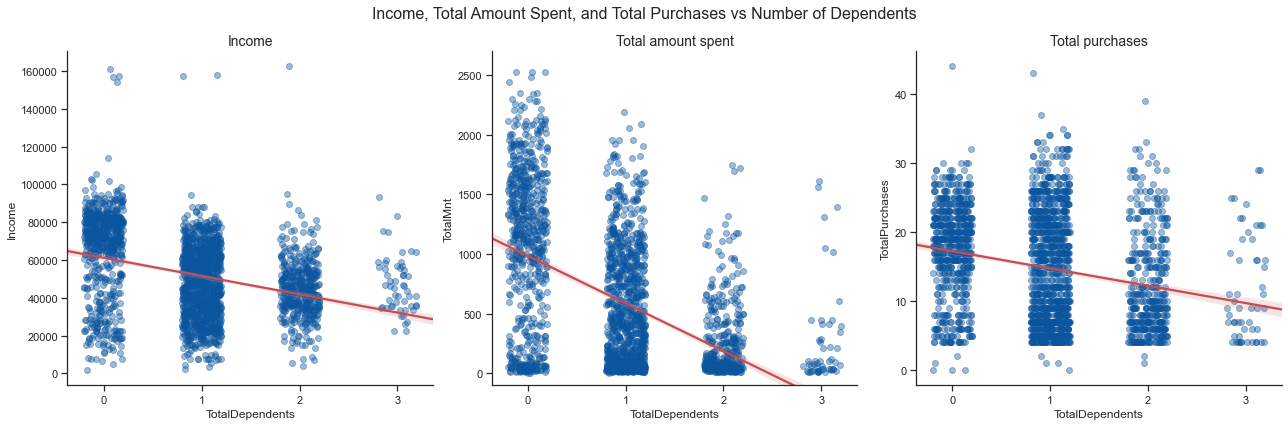

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=[18,6])

variables = ['Income','TotalMnt','TotalPurchases']
labels = ['Income','Total amount spent','Total purchases']

for i in range(len(variables)):
    var = variables[i]
    label = labels[i]
    sns.regplot(x='TotalDependents', 
                y=var, 
                data=df, 
                ax=ax[i], 
                x_jitter=0.2, 
                truncate=False, 
                scatter_kws={'alpha': 0.4, "color":default_color}, 
                line_kws={'color': 'r'})
    ax[i].set_title(label=label, fontsize=14);
    
ticks = [0,1,2,3]
ax[0].set(xticks=ticks, xticklabels=ticks)
ax[1].set(ylim=(-100,2700), xticks=ticks, xticklabels=ticks)
ax[2].set(xticks=ticks, xticklabels=ticks)
          
plt.suptitle(t="Income, Total Amount Spent, and Total Purchases vs Number of Dependents", fontsize=16)
plt.tight_layout();

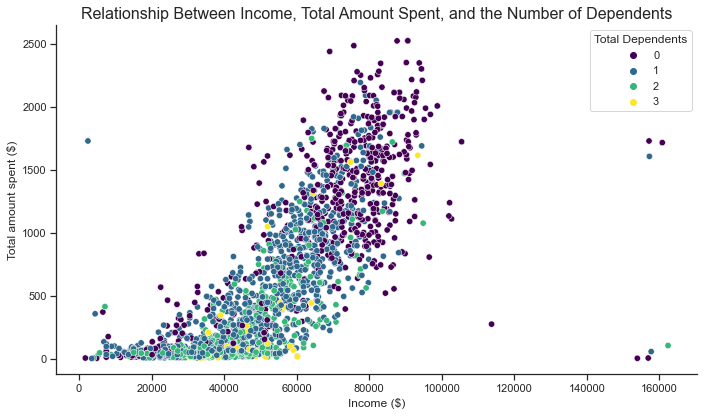

In [15]:
sns.scatterplot(data=df, 
                x="Income", 
                y="TotalMnt", 
                hue= "TotalDependents", 
                palette='viridis',
                s=40);

plt.xlabel("Income ($)")
plt.ylabel("Total amount spent ($)")
plt.legend(title="Total Dependents")
plt.title("Relationship Between Income, Total Amount Spent, and the Number of Dependents", size=16)
plt.tight_layout(pad=1.5);

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 585094 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
